In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d sagyamthapa/handwritten-math-symbols

 99% 39.0M/39.4M [00:02<00:00, 25.0MB/s]
100% 39.4M/39.4M [00:02<00:00, 17.1MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('handwritten-math-symbols.zip','r')
zip_ref.extractall('./content')
zip_ref.close()

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import join, isfile
from PIL import Image

In [8]:
# padding
# image comes as np array
def cropResizeAndPadd(img):

  if img is None:
    return None

  img=~img

  _,thrsh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  cntr,_=cv2.findContours(thrsh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  if len(cntr)>1:
    return None

  # plt.imshow(img)

  rect=cv2.boundingRect(cntr[0])

  img_crop=img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]

  # width>height
  if(img_crop.shape[1]>img_crop.shape[0]):
    scale=int(40*100/img_crop.shape[1])
  else:
    scale=int(40*100/img_crop.shape[0])

  width=int(img_crop.shape[1]*scale/100)
  height=int(img_crop.shape[0]*scale/100)

  img_resize=cv2.resize(img_crop,(width,height))

  # plt.imshow(img_resize)

  # padding
  m=img_resize.shape[0]
  n=img_resize.shape[1]

  left=(40-n)//2
  right=40-n-left
  up=(40-m)//2
  down=40-m-up

  # padding up
  for _ in range(up):
    img_resize=np.insert(img_resize,0,np.array([0 for i in range(n)]),axis=0)

  # padding down
  for _ in range(down):
    img_resize=np.insert(img_resize,img_resize.shape[0],np.array([0 for i in range(n)]),axis=0)

  # padding left
  for _ in range(left):
    img_resize=np.insert(img_resize,0,np.array([0 for i in range(40)]),axis=1)

  # padding right
  for _ in range(right):
    img_resize=np.insert(img_resize,img_resize.shape[1],np.array([0 for i in range(40)]),axis=1)

  return img_resize

In [21]:
path='/content/content/dataset/9'

data=[]

for file in listdir(path):
  img=cv2.imread(join(path,file),cv2.IMREAD_GRAYSCALE)
  img_cvt=cropResizeAndPadd(img)

  if img_cvt is not None:
    img_reshape=np.reshape(img_cvt,(1600,1))
    img_reshape=np.append(img_reshape,['9'])

  data.append(img_reshape)

df_data=pd.DataFrame(data,index=None)
df_data.to_csv('nine.csv',index=None)

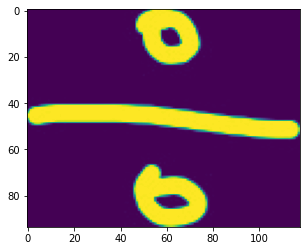

In [49]:
# for division, since it contains 3 symbols
path='/content/content/dataset/div'
data=[]

for file in listdir(path):
  img=cv2.imread(join(path,file),cv2.IMREAD_GRAYSCALE)

  if img is None:
    continue

  img=~img
  _,thrsh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  cntr,_=cv2.findContours(thrsh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  if len(cntr)!=3:
    continue

  rect1=cv2.boundingRect(cntr[0])
  rect2=cv2.boundingRect(cntr[1])
  rect3=cv2.boundingRect(cntr[2])

  rect=[-1,-1,-1,-1]

  rect[0]=min(rect1[0],rect2[0],rect3[0])
  rect[1]=min(rect1[1],rect2[1],rect3[1])
  rect[2]=max(rect1[0]+rect1[2],rect2[0]+rect2[2],rect3[0]+rect3[2])-rect[0]
  rect[3]=max(rect1[1]+rect1[3],rect2[1]+rect2[3],rect3[1]+rect3[3])-rect[1]

  img_crop=img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]

  # plt.imshow(img_crop)

  # width>height
  if(img_crop.shape[1]>img_crop.shape[0]):
    scale=int(40*100/img_crop.shape[1])
  else:
    scale=int(40*100/img_crop.shape[0])

  width=int(img_crop.shape[1]*scale/100)
  height=int(img_crop.shape[0]*scale/100)

  img_resize=cv2.resize(img_crop,(width,height))

  # padding
  m=img_resize.shape[0]
  n=img_resize.shape[1]

  left=(40-n)//2
  right=40-n-left
  up=(40-m)//2
  down=40-m-up

  # padding up
  for _ in range(up):
    img_resize=np.insert(img_resize,0,np.array([0 for i in range(n)]),axis=0)

  # padding down
  for _ in range(down):
    img_resize=np.insert(img_resize,img_resize.shape[0],np.array([0 for i in range(n)]),axis=0)

  # padding left
  for _ in range(left):
    img_resize=np.insert(img_resize,0,np.array([0 for i in range(40)]),axis=1)

  # padding right
  for _ in range(right):
    img_resize=np.insert(img_resize,img_resize.shape[1],np.array([0 for i in range(40)]),axis=1)

  
  img_reshape=np.reshape(img_resize,(1600,1))
  img_reshape=np.append(img_reshape,['13'])

  data.append(img_reshape)

df_data=pd.DataFrame(data,index=None)
df_data.to_csv('division.csv',index=None)

In [52]:
div=pd.read_csv('division.csv')
mul=pd.read_csv('multiply.csv')
mins=pd.read_csv('minus.csv')
plus=pd.read_csv('plus.csv')
one=pd.read_csv('one.csv')
two=pd.read_csv('two.csv')
three=pd.read_csv('three.csv')
four=pd.read_csv('four.csv')
five=pd.read_csv('five.csv')
six=pd.read_csv('six.csv')
seven=pd.read_csv('seven.csv')
eight=pd.read_csv('eight.csv')
nine=pd.read_csv('nine.csv')
zero=pd.read_csv('zero.csv')

In [53]:
frames=[div,mul,mins,plus,one,two,three,four,five,six,seven,eight,nine,zero]

dataset=pd.concat(frames)

In [54]:
dataset=dataset.sample(frac=1).reset_index(drop=True)

In [55]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [56]:
dataset.to_csv('dataset.csv')

In [57]:
dataset['1600']

0        8
1        0
2        0
3        0
4       13
        ..
7703     3
7704    12
7705     9
7706    10
7707     1
Name: 1600, Length: 7708, dtype: int64